<a href="https://colab.research.google.com/github/Manj1/Data-Science/blob/master/Copy_of_pharm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset

excel_f = 'my_pharm_pss.xlsx'
pharm = pd.read_excel(excel_f)
pharm.head()

,sn,q1,q2,q3,q4,q5,q6,q7,q9,q10,q13,q11,q12,d2,d1,d3,d4,d5,d6
0,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,1.0,3.0,1.0,4.0,1.0,2.0,2.0,2.0
1,2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,2.0
2,3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0
3,4,3.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,3.0,3.0,2.0,6.0,2.0,2.0,1.0,3.0,1.0,3.0
4,5,3.0,1.0,4.0,4.0,5.0,5.0,3.0,2.0,NaN,4.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0


## Data Preparation

In [ ]:
#Give categories their respictive responses instead of numeric codes

pharm['d2'].replace({1:'Male', 2:'Female'}, inplace=True)
pharm['d1'].replace({1:'Under 18yrs', 2:'18 to 30yrs', 3:'31 to 40yrs', 4:'41 to 50yrs', 5:'51 to 60yrs', 7:'above 60yrs'}, inplace=True)
pharm['d3'].replace({1:'Routine', 2:'Emergency'}, inplace=True)
pharm['d4'].replace({1:'Insurance/Corporate', 2:'Cash', 3:'Both'}, inplace=True)
pharm['d5'].replace({1:'1st Visit', 2:'2nd-4th Visit', 3:'5th and above'}, inplace=True)
pharm['d6'].replace({1:'>30 min', 2:'20-30 min', 3:'10-20 min', 4:'10 min'}, inplace=True)
pharm.head()

,sn,q1,q2,q3,q4,q5,q6,q7,q9,q10,q13,q11,q12,d2,d1,d3,d4,d5,d6
0,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,1.0,3.0,Male,41 to 50yrs,Routine,Cash,2nd-4th Visit,20-30 min
1,2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,3.0,Male,31 to 40yrs,Routine,Insurance/Corporate,1st Visit,20-30 min
2,3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,Female,18 to 30yrs,Routine,Cash,2nd-4th Visit,10-20 min
3,4,3.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,3.0,3.0,2.0,6.0,Female,18 to 30yrs,Routine,Both,1st Visit,10-20 min
4,5,3.0,1.0,4.0,4.0,5.0,5.0,3.0,2.0,NaN,4.0,3.0,3.0,Male,Under 18yrs,Routine,Insurance/Corporate,2nd-4th Visit,10-20 min


In [ ]:
len(pharm)

1862

To treat empty fields, we need to look at the number and the type of data

In [ ]:
# We'd like to look out for empty fields that exceed 5% (100) of the data, as they could have an impact on our tests.
pharm.isnull().sum()

sn        0
q1        8
q2        6
q3       12
q4       20
q5       28
q6       24
q7       16
q9       30
q10     180
q13      26
q11      90
q12    1742
d2        2
d1        2
d3       68
d4        2
d5        8
d6       12
dtype: int64

In [ ]:
#We remove the sn(serial number) column and columns with more than 5% (93) empty fields

pharm.drop(['sn','q10','q12'], axis=1, inplace=True)
pharm.head()

,q1,q2,q3,q4,q5,q6,q7,q9,q13,q11,d2,d1,d3,d4,d5,d6
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,Male,41 to 50yrs,Routine,Cash,2nd-4th Visit,20-30 min
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,Male,31 to 40yrs,Routine,Insurance/Corporate,1st Visit,20-30 min
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,Female,18 to 30yrs,Routine,Cash,2nd-4th Visit,10-20 min
3,3.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,3.0,2.0,Female,18 to 30yrs,Routine,Both,1st Visit,10-20 min
4,3.0,1.0,4.0,4.0,5.0,5.0,3.0,2.0,4.0,3.0,Male,Under 18yrs,Routine,Insurance/Corporate,2nd-4th Visit,10-20 min


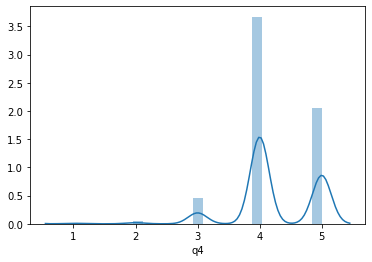

In [ ]:
#Look at the type of responses, mainly categorical
sns.distplot(pharm['q4']);

In [ ]:
#Since they are categorical data, we fill empty fields with the mode response in each column or variable

for column in pharm.columns:
    pharm[column].fillna(pharm[column].mode()[0], inplace=True)

In [ ]:
#Check for null values

pharm.isnull().sum()

q1     0
q2     0
q3     0
q4     0
q5     0
q6     0
q7     0
q9     0
q13    0
q11    0
d2     0
d1     0
d3     0
d4     0
d5     0
d6     0
dtype: int64

We choose groups to test hypothesis on based on their sizes and attribute to measure

In [ ]:
#We do a cross tab to see demographic sizes

pd.crosstab(pharm.d1,pharm.q4.sum())

col_0,7870.0
d1,
18 to 30yrs,204
31 to 40yrs,696
41 to 50yrs,768
51 to 60yrs,124
Under 18yrs,58
above 60yrs,12


In [ ]:
#Calculate mean values

age_mean = pharm.groupby('d1').mean()
age_mean

,q1,q2,q3,q4,q5,q6,q7,q9,q13,q11
d1,,,,,,,,,,
18 to 30yrs,4.210784,3.622549,4.220588,4.156863,4.009804,4.137255,4.147059,4.323529,4.480392,1.901961
31 to 40yrs,4.399425,3.729885,4.341954,4.244253,4.149425,4.195402,4.214080,4.175287,4.385057,1.966954
41 to 50yrs,4.360677,3.654948,4.347656,4.229167,4.156250,4.143229,4.196615,4.135417,4.382812,1.963542
51 to 60yrs,4.354839,3.717742,4.258065,4.250000,4.088710,4.064516,4.145161,4.193548,4.322581,1.991935
Under 18yrs,4.120690,3.603448,4.189655,4.189655,4.034483,4.155172,3.896552,4.206897,4.500000,1.758621
above 60yrs,4.250000,3.833333,4.083333,4.166667,4.083333,3.750000,4.000000,4.000000,4.250000,1.666667


In [ ]:
#Calculate the mean value in percentage form

pharm_r = (pharm.groupby('d1').mean())/5
pharm_r.reset_index(inplace=True)
pharm_r

,d1,q1,q2,q3,q4,q5,q6,q7,q9,q13,q11
0,18 to 30yrs,0.842157,0.724510,0.844118,0.831373,0.801961,0.827451,0.829412,0.864706,0.896078,0.380392
1,31 to 40yrs,0.879885,0.745977,0.868391,0.848851,0.829885,0.839080,0.842816,0.835057,0.877011,0.393391
2,41 to 50yrs,0.872135,0.730990,0.869531,0.845833,0.831250,0.828646,0.839323,0.827083,0.876563,0.392708
3,51 to 60yrs,0.870968,0.743548,0.851613,0.850000,0.817742,0.812903,0.829032,0.838710,0.864516,0.398387
4,Under 18yrs,0.824138,0.720690,0.837931,0.837931,0.806897,0.831034,0.779310,0.841379,0.900000,0.351724
5,above 60yrs,0.850000,0.766667,0.816667,0.833333,0.816667,0.750000,0.800000,0.800000,0.850000,0.333333


In hypothesis testing between independent groups, the groups being tested need to be of the same size

In [ ]:
#We create two groups of different ages, similar in size

age_gr1 = pharm[pharm['d1']=='31 to 40yrs'].sample(690)
age_gr2 = pharm[pharm['d1']=='41 to 50yrs'].sample(690)
age_gr2.sample(9)

,q1,q2,q3,q4,q5,q6,q7,q9,q13,q11,d2,d1,d3,d4,d5,d6
456,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,Male,41 to 50yrs,Routine,Cash,5th and above,10-20 min
30,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,Male,41 to 50yrs,Routine,Cash,5th and above,20-30 min
29,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,Male,41 to 50yrs,Routine,Cash,5th and above,10-20 min
786,5.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,2.0,Female,41 to 50yrs,Routine,Insurance/Corporate,2nd-4th Visit,>30 min
1056,5.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,2.0,Male,41 to 50yrs,Routine,Insurance/Corporate,5th and above,20-30 min
1689,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,Female,41 to 50yrs,Routine,Insurance/Corporate,2nd-4th Visit,>30 min
687,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,Female,41 to 50yrs,Routine,Insurance/Corporate,5th and above,20-30 min
115,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,Male,41 to 50yrs,Routine,Insurance/Corporate,2nd-4th Visit,10-20 min
1031,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2.0,Female,41 to 50yrs,Routine,Insurance/Corporate,5th and above,>30 min


## Hypothesis Testing

H0: no significant difference between groups

H1: there is significant difference between groups

In [ ]:
# Use z-test since samples > 30

ztest ,pval = stests.ztest(age_gr1['q1'], x2=age_gr2['q1'], value=0, alternative='two-sided')

print("p-value is:", pval)

if pval<0.05:
    print("Since the p-value is <5%, we reject the null hypothesis")
else:
    print("Since the p-value is >5%, we fail to reject the null hypothesis")

p-value is: 0.1651644703011208
Since the p-value is >5%, we fail to reject the null hypothesis


In [ ]:
#Loop hypothesis test across all columns

for column in pharm.columns[:9]:
    ztest ,pval = stests.ztest(age_gr1[column], x2=age_gr2[column], value=0, alternative='two-sided')
    print("p-value is:", pval)
    if pval<0.05:
        print("for", column, "Since the p-value is <5%, we reject the null hypothesis")
    else:
        print("for", column, "Since the p-value is >5%, we fail to reject the null hypothesis")

p-value is: 0.1651644703011208
for q1 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.10194429429694887
for q2 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.7942259298390363
for q3 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.5507450558997515
for q4 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.7655194865621201
for q5 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.11955157110770956
for q6 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.571117885359849
for q7 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.16793784937675915
for q9 Since the p-value is >5%, we fail to reject the null hypothesis
p-value is: 0.9009394671180675
for q13 Since the p-value is >5%, we fail to reject the null hypothesis


Let's organize our test for each question and conclusion into a table

In [ ]:
#we create a list of all the ccolumns and respective p-values
my_list = []

for column in pharm.columns[:9]:
    ztest ,pval = stests.ztest(age_gr1[column], x2=age_gr2[column], value=0, alternative='two-sided')
    my_list.append(column)
    my_list.append(pval)
        
my_list

['q1',
 0.1651644703011208,
 'q2',
 0.10194429429694887,
 'q3',
 0.7942259298390363,
 'q4',
 0.5507450558997515,
 'q5',
 0.7655194865621201,
 'q6',
 0.11955157110770956,
 'q7',
 0.571117885359849,
 'q9',
 0.16793784937675915,
 'q13',
 0.9009394671180675]

In [ ]:
#Convert the list to a dictionary to make it easier to convert to a dictionary

def Convert(a): 
    ita = iter(my_list) 
    res_dct = dict(zip(ita, ita)) 
    return res_dct 

my_dict = Convert(my_list)
my_dict

{'q1': 0.1651644703011208,
 'q2': 0.10194429429694887,
 'q3': 0.7942259298390363,
 'q4': 0.5507450558997515,
 'q5': 0.7655194865621201,
 'q6': 0.11955157110770956,
 'q7': 0.571117885359849,
 'q9': 0.16793784937675915,
 'q13': 0.9009394671180675}

In [ ]:
#Create a dataframe from the dict

h_result = pd.DataFrame(my_dict.items(), columns=['Question', 'P-value'])
h_result

,Question,P-value
0,q1,0.165164
1,q2,0.101944
2,q3,0.794226
3,q4,0.550745
4,q5,0.765519
5,q6,0.119552
6,q7,0.571118
7,q9,0.167938
8,q13,0.900939


H0: no significant difference between groups

H1: there is significant difference between groups


In [ ]:
#Create a conclusion column

h_result['Conclusion'] = h_result.apply(lambda row: 'Significant Difference exists' if row['P-value']<0.05 else 'No Significant Difference', axis=1)

h_result

,Question,P-value,Conclusion
0,q1,0.165164,No Significant Difference
1,q2,0.101944,No Significant Difference
2,q3,0.794226,No Significant Difference
3,q4,0.550745,No Significant Difference
4,q5,0.765519,No Significant Difference
5,q6,0.119552,No Significant Difference
6,q7,0.571118,No Significant Difference
7,q9,0.167938,No Significant Difference
8,q13,0.900939,No Significant Difference
